# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod i w pojawiającym się czarnym obrazie kliknij jeden punkt 
   2. Zamknij edycję przyciskiem w belce okna (obok bazwy Figure 1). Wygenerowany obraz będzie dostępny pod nazwą im.

(-0.5, 63.5, 63.5, -0.5)

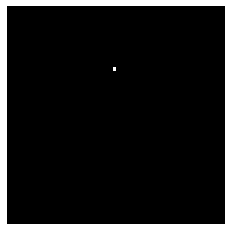

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os

if not os.path.exists("kwadraty.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
H, theta, rho = hough_line(im)

In [3]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

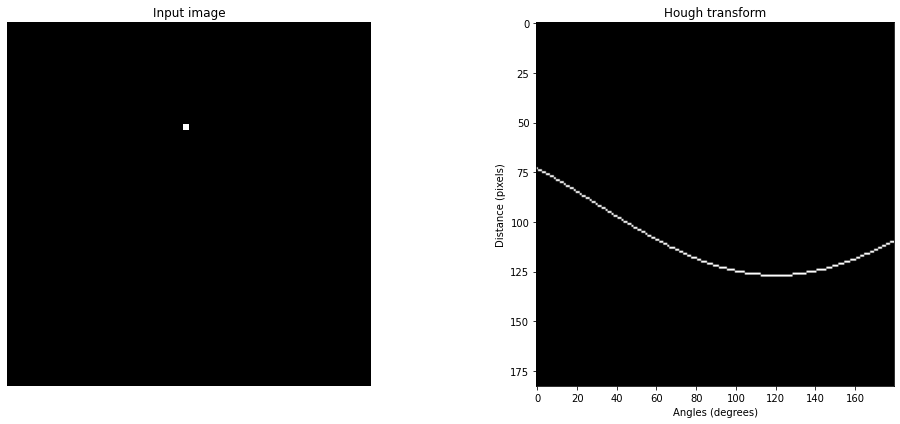

In [4]:
show_hough(H, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

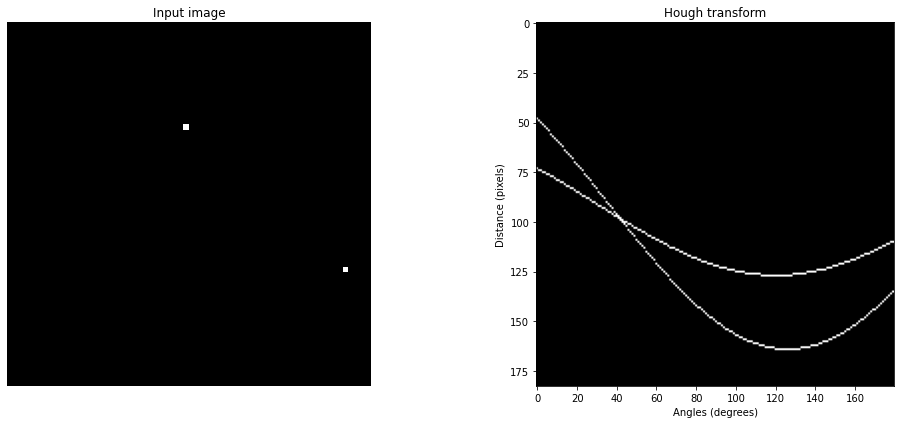

In [5]:
im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1
im[43, 59] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)

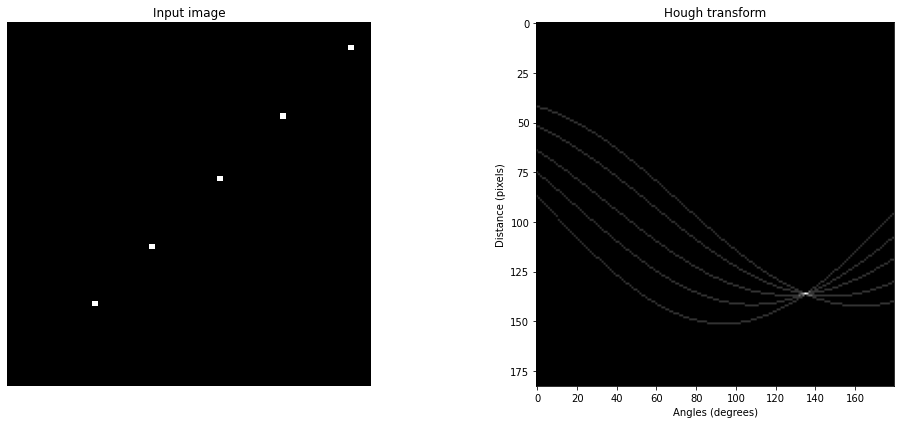

In [6]:
im = np.zeros((64,64), dtype=np.uint8)

im[4, 60] = 1
im[16, 48] = 1
im[27, 37] = 1
im[39, 25] = 1
im[49, 15] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

In [7]:
def imread(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [8]:
def plot_img(img, cmap='gray', title=''):
    plt.figure(figsize=(16, 9))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [9]:
kwadraty = imread('kwadraty.png')

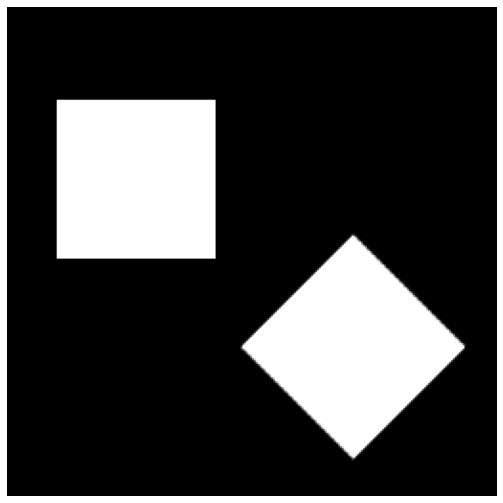

In [10]:
plot_img(kwadraty)

In [11]:
edges = cv2.Canny(kwadraty, 100, 200, None, 3, 2)

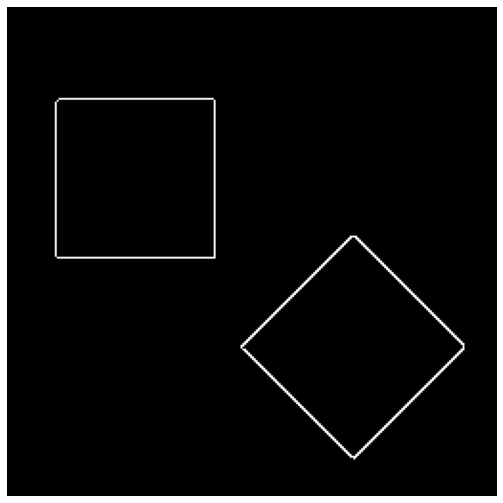

In [12]:
plot_img(edges)

In [13]:
H, theta, rho = hough_line(edges)

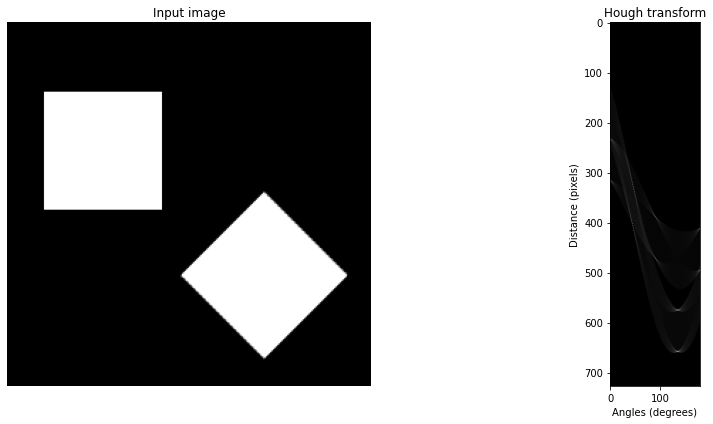

In [14]:
show_hough(H, kwadraty)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

In [15]:
mH, mtheta, mrho = hough_line_peaks(H, theta, rho, num_peaks=8)

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

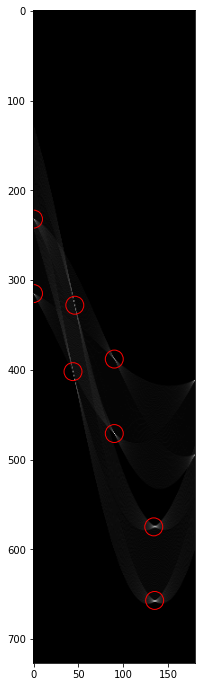

In [16]:
fig,ax = plt.subplots(1, figsize=(10, 12))
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

for t, r in zip(mtheta, mrho):
    t = (t + np.pi / 2) * (180 / np.pi)
    r = r + H.shape[0] // 2
    
    
    circle = plt.Circle((t, r), 10, color='r', fill=False)
    ax.add_patch(circle)
    
plt.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

In [17]:
r = cv2.HoughLines(edges, 1, np.pi / 180, 60)

In [18]:
r.shape

(13, 1, 2)

In [19]:
rho, theta = r[:, 0, 0], r[:, 0, 1]

In [20]:
a = np.cos(theta)
b = np.sin(theta)
x0 = rho * np.cos(theta)
y0 = rho * np.sin(theta)
x1 = (x0 + 1000*(-b)).astype(np.int32)
y1 = (y0 + 1000*(a)).astype(np.int32)
x2 = (x0 - 1000*(-b)).astype(np.int32)
y2 = (y0 - 1000*(a)).astype(np.int32)

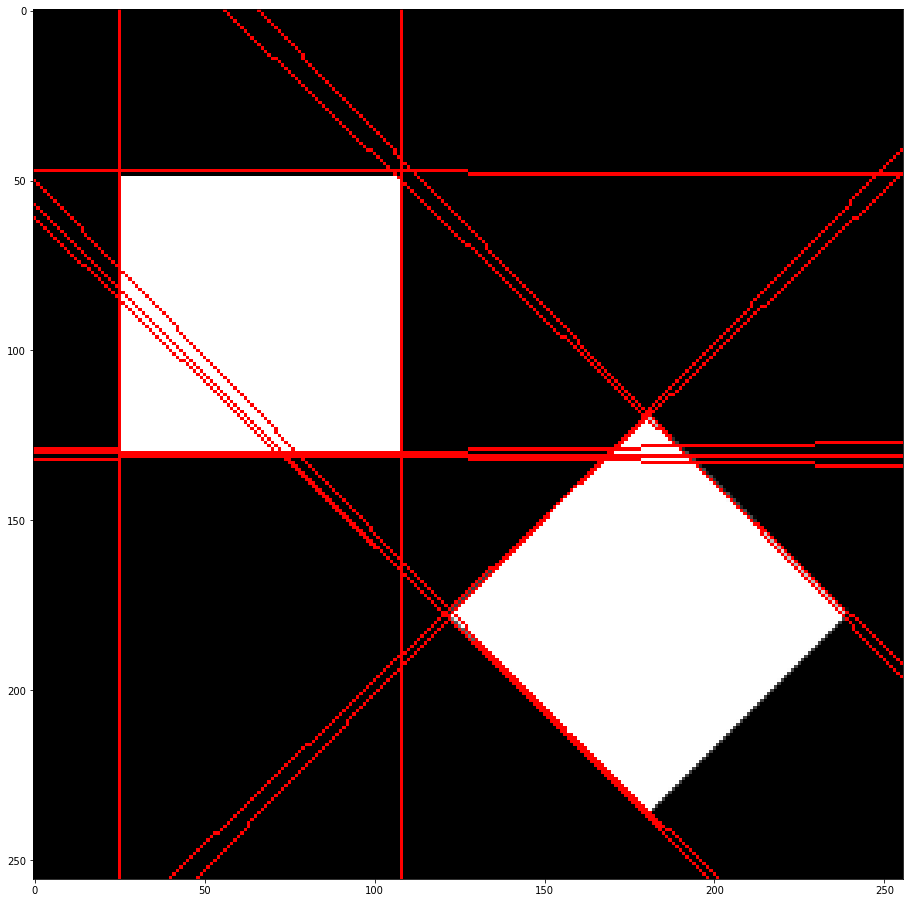

In [21]:
fig,ax = plt.subplots(1, figsize=(16, 16))
sq = cv2.cvtColor(kwadraty, cv2.COLOR_GRAY2RGB)
for i in range(r.shape[0]):
    sq = cv2.line(sq, (x1[i], y1[i]), (x2[i], y2[i]), (255, 0, 0))

ax.imshow(sq)
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

In [22]:
r = cv2.HoughLinesP(edges, 1, np.pi / 180, 40)

In [23]:
r.shape

(12, 1, 4)

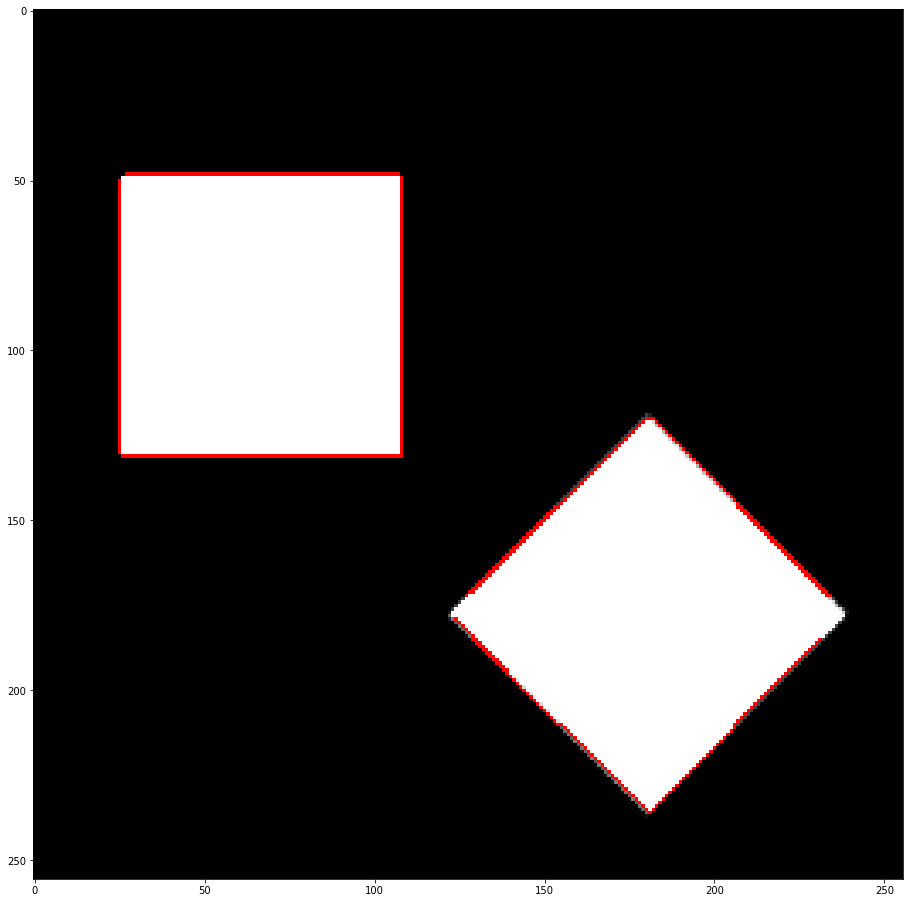

In [24]:
fig,ax = plt.subplots(1, figsize=(16, 16))
sq = cv2.cvtColor(kwadraty, cv2.COLOR_GRAY2RGB)
for i in range(r.shape[0]):
    sq = cv2.line(sq, r[i][0][:2], r[i][0][2:], (255, 0, 0))

ax.imshow(sq)
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

In [25]:
lab112 = imread('lab112.png')

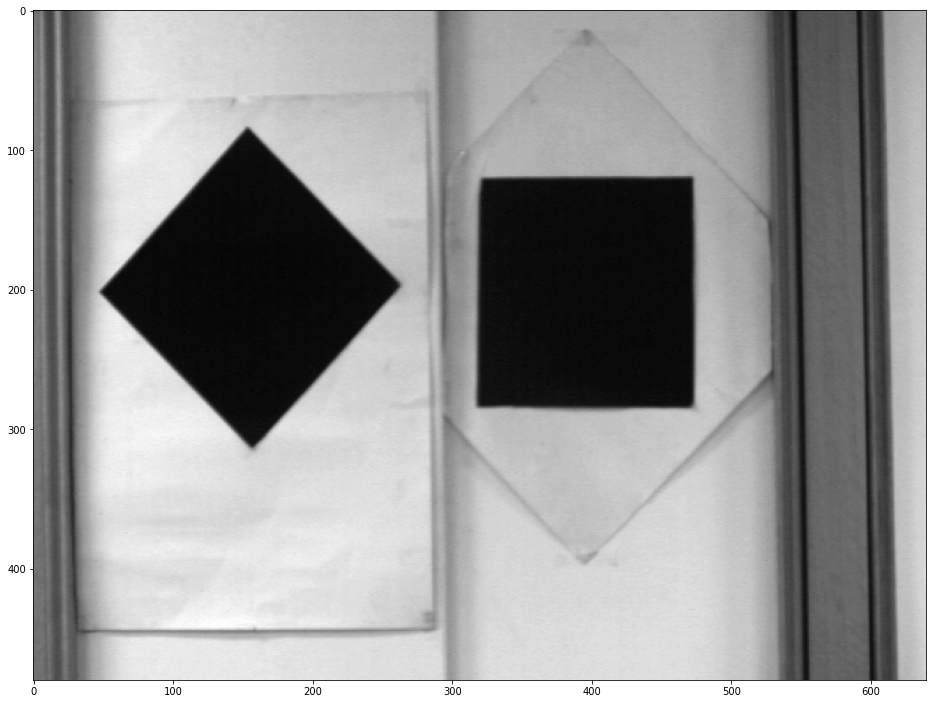

In [26]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(lab112, cmap='gray')
plt.show()

In [27]:
_, binlab = cv2.threshold(lab112, 40, 255, cv2.THRESH_BINARY_INV)

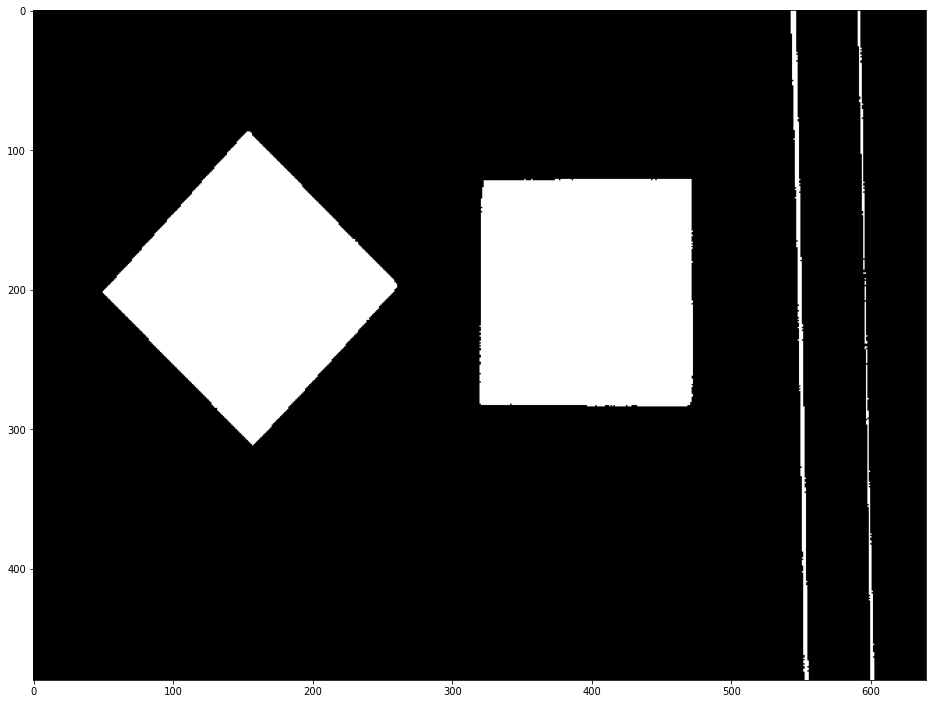

In [28]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.imshow(binlab, cmap='gray')
plt.show()

In [29]:
kernel = np.ones((5, 5))
eroded = cv2.erode(binlab, kernel)
dilated = cv2.dilate(eroded, kernel)

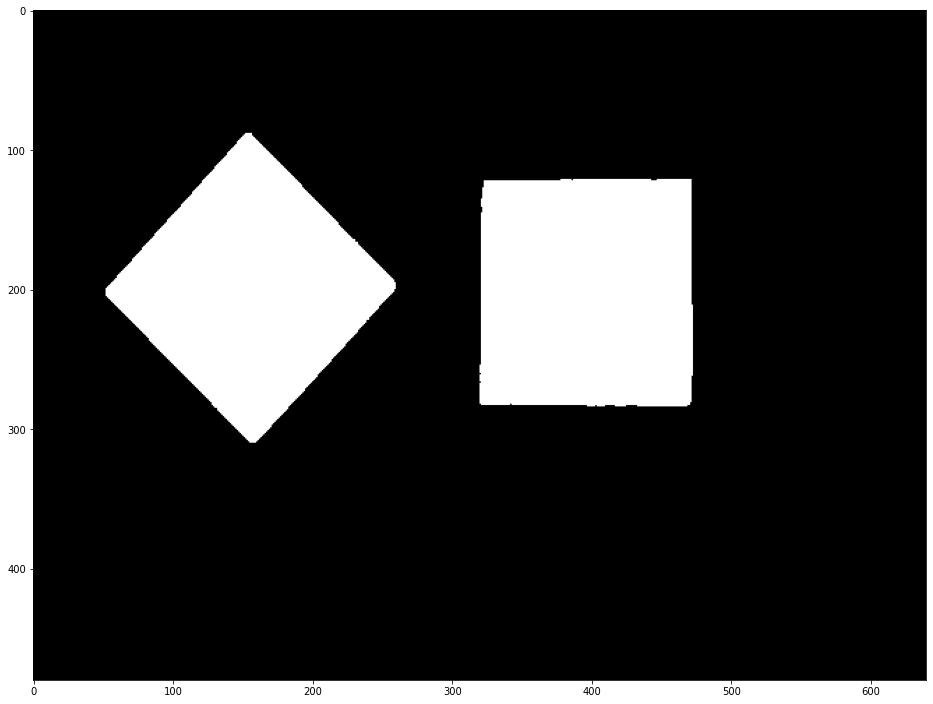

In [30]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.imshow(dilated, cmap='gray')
plt.show()

In [31]:
edges = cv2.Canny(dilated, 100, 200, None, 3, 2)

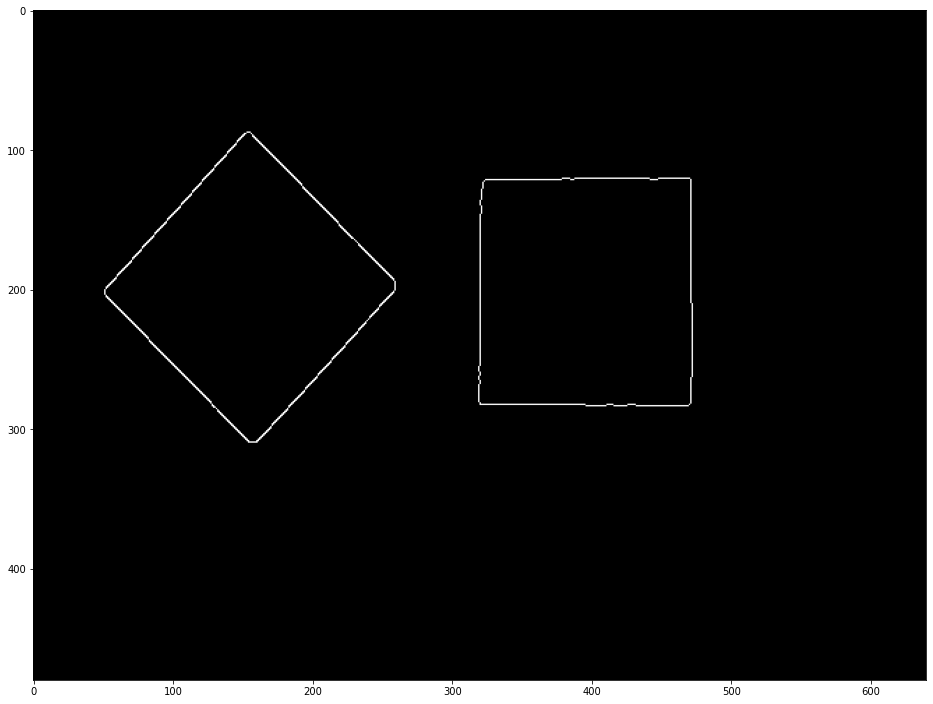

In [32]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.imshow(edges, cmap='gray')
plt.show()

In [33]:
H, theta, rho = hough_line(edges)
mH, mtheta, mrho = hough_line_peaks(H, theta, rho, num_peaks=8)

In [34]:
a = np.cos(mtheta)
b = np.sin(mtheta)
x0 = mrho * np.cos(mtheta)
y0 = mrho * np.sin(mtheta)
x1 = (x0 + 1000*(-b)).astype(np.int32)
y1 = (y0 + 1000*(a)).astype(np.int32)
x2 = (x0 - 1000*(-b)).astype(np.int32)
y2 = (y0 - 1000*(a)).astype(np.int32)

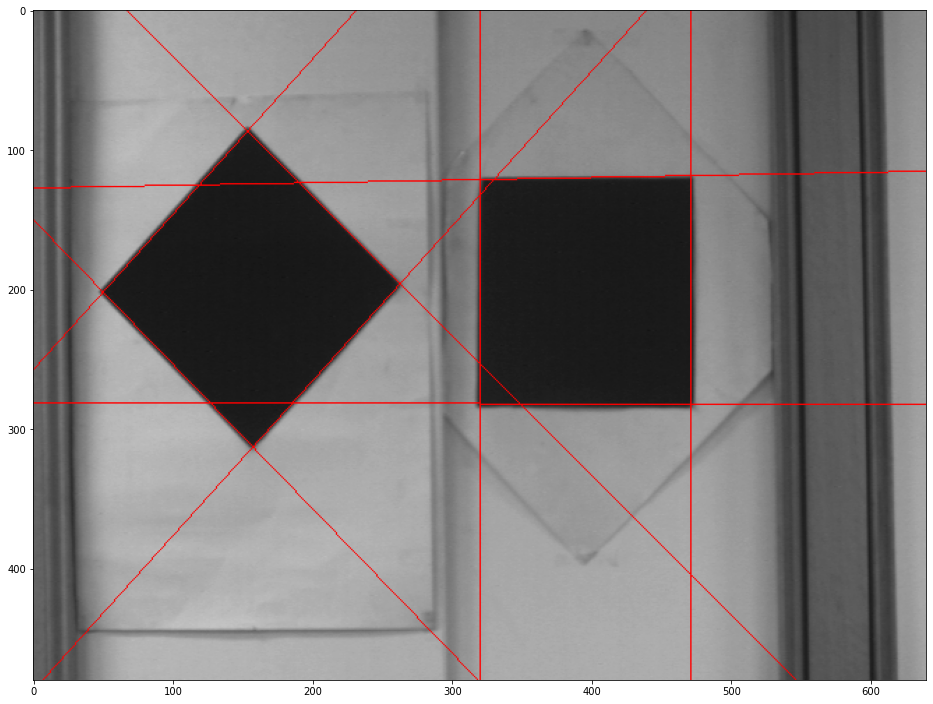

In [35]:
fig,ax = plt.subplots(1, figsize=(16, 16))
lab = cv2.cvtColor(lab112, cv2.COLOR_GRAY2RGB)
for i in range(x1.shape[0]):
    lab = cv2.line(lab, (x1[i], y1[i]), (x2[i], y2[i]), (255, 0, 0))

ax.imshow(lab)
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

In [36]:
dom = imread('dom.png')

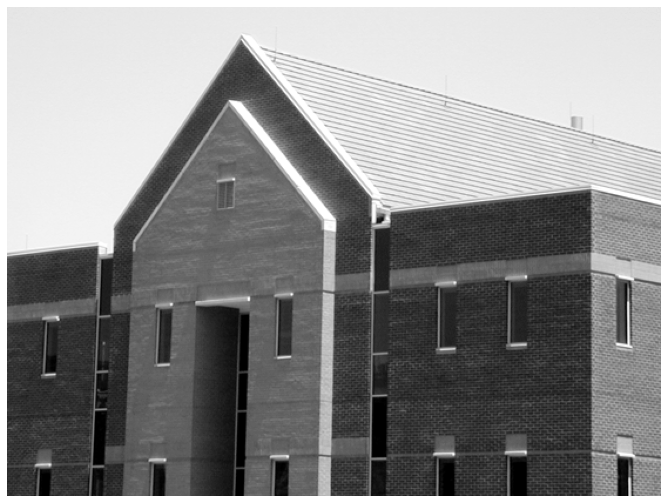

In [37]:
plot_img(dom)

Trying out Sobel...

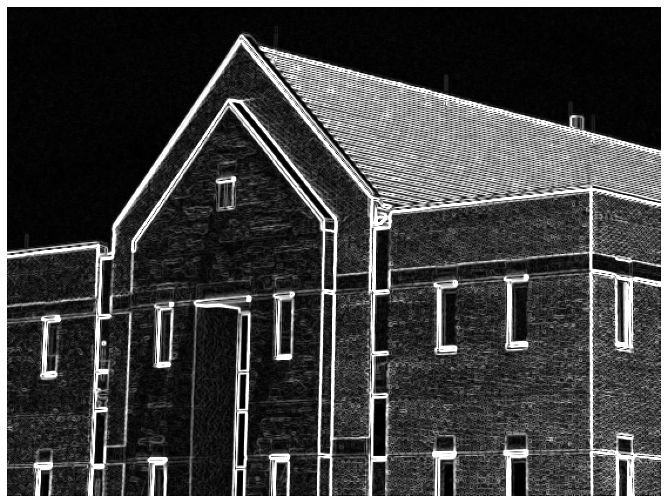

In [38]:
sobelx = cv2.Sobel(dom, cv2.CV_64F, dx=1, dy=0)
sobely = cv2.Sobel(dom, cv2.CV_64F, dx=0, dy=1)
s = np.sqrt(np.square(sobelx) + np.square(sobely))
plot_img(s)

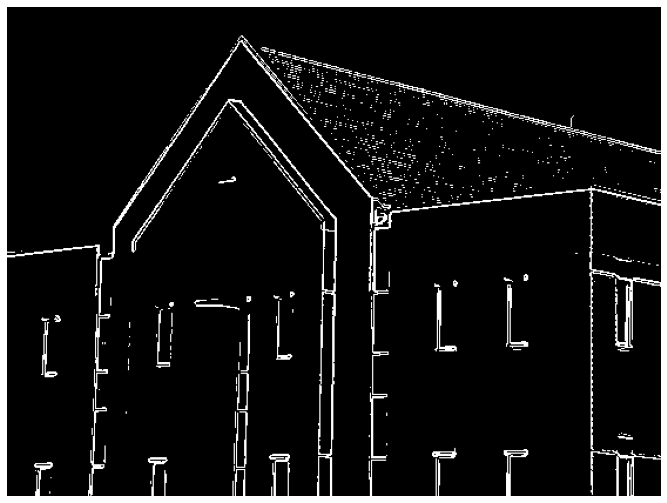

In [39]:
_, b = cv2.threshold(s, 254, 255, cv2.THRESH_BINARY)
plot_img(b)

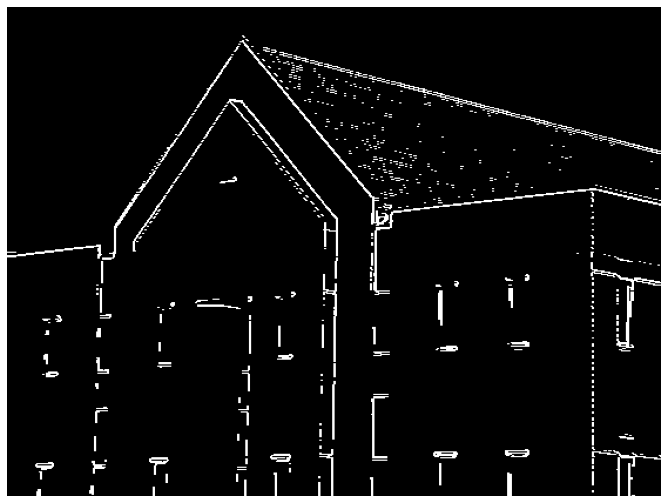

In [40]:
kernel = np.ones((1, 2))
eroded = cv2.erode(b, kernel)
dilated = cv2.dilate(eroded, kernel)

plot_img(dilated)

Did not work well after that...

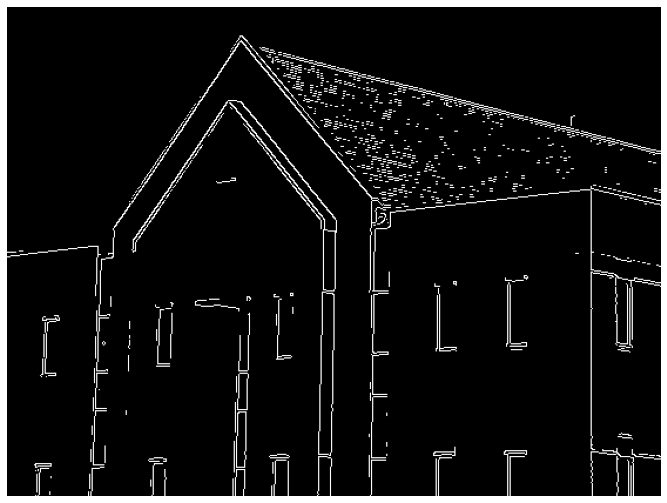

In [41]:
edges = cv2.Canny(dom, 230, 255, None, 3, 2)
plot_img(edges)

In [42]:
components, ccl, frames, centroids = cv2.connectedComponentsWithStats(edges)

In [43]:
edges_c = edges.copy()
for i in range(1, components):
    if frames[i][4] < 100:
        edges_c[ccl == i] = 0

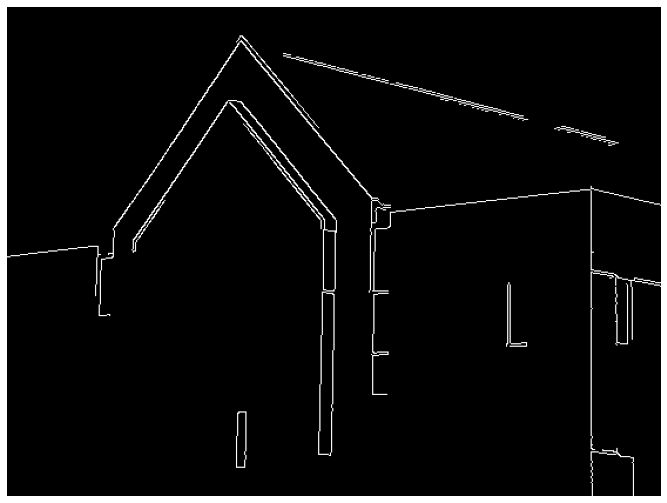

In [44]:
plot_img(edges_c)

In [45]:
r = cv2.HoughLinesP(edges_c, 1, np.pi / 180, 40, minLineLength=55, maxLineGap=30)

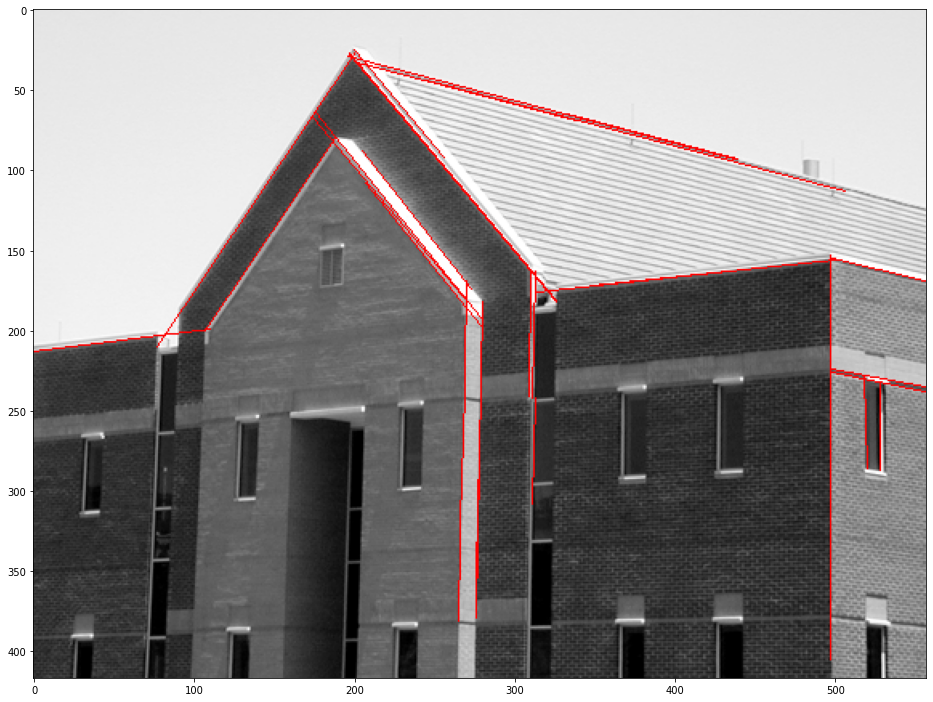

In [46]:
fig,ax = plt.subplots(1, figsize=(16, 16))
sq = cv2.cvtColor(dom, cv2.COLOR_GRAY2RGB)
for i in range(r.shape[0]):
    sq = cv2.line(sq, r[i][0][:2], r[i][0][2:], (255, 0, 0))

ax.imshow(sq)
plt.show()